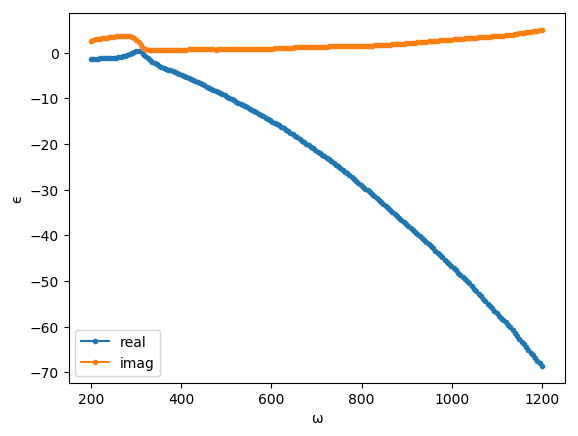

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[7]:27
└ @ Core ./In[7]:27
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[7]:27
└ @ Core ./In[7]:27


PyObject <matplotlib.legend.Legend object at 0x143665390>

In [7]:
using PyPlot, DelimitedFiles, Interpolations
RawData = (open(readdlm,"/Users/jayyao/Documents/Research/LDOS/Materials/METALS_Silver_Palik.txt"))
N = size(RawData)[1]-1

Lambda = RawData[2:end,1]
n = RawData[2:end,2]
k = RawData[2:end,3]

Omega = 2*π*3e8./Lambda*1e6
Epsilon = (n+1im*k).^2

A_x = Omega[end:-1:1]
knots = (A_x,)
Εr = real(Epsilon[end:-1:1])
Εi = imag(Epsilon[end:-1:1])
itpr = interpolate(knots, Εr, Gridded(Linear()))
itpi = interpolate(knots, Εi, Gridded(Linear()))
N = 200
lambda = range(200,stop=1200,length=N)/1e9
omega = zeros(N)
epsilon = zeros(Complex,N)
d = 10e-9
for i=1:N
    k = 2*π/lambda[i]
    ω = k*3e8
    omega[i] = ω
    ϵ = itpr[ω]+itpi[ω]*1im-1
    epsilon[i] = ϵ
end
plot(lambda*1e9,real(epsilon),".-",label="real")
#plot([200,400],[0.5,0.5])
#lambdap = 334
#plot([lambdap,lambdap],[0.0,0.65])
plot(lambda*1e9,imag(epsilon),".-",label="imag")
#xlim([300,350])
xlabel("ω")
ylabel("ϵ")
legend()

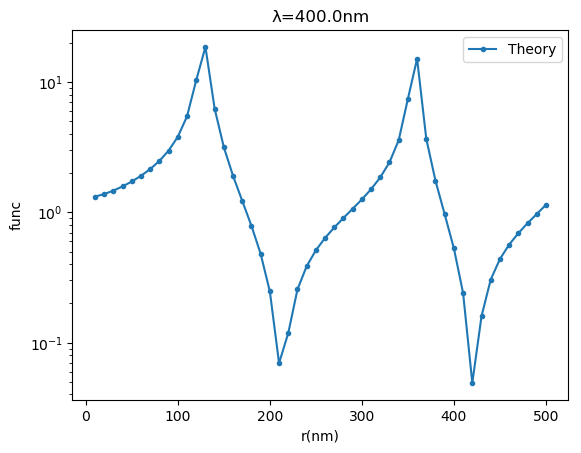

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6


PyObject <matplotlib.legend.Legend object at 0x1469b67f0>

In [73]:
using JLD, SpecialFunctions
ρe = load("/Users/jayyao/Documents/Research/LDOS/Program/LDOS02/Sphere_lambda_300_800_d_10_500.jld", "ρe")
λ0 = 400e-9
k0 = 2*π/λ0
ω = k0*3e8
ϵm = itpr[ω]+itpi[ω]*1im
#ϵm = -1.0+0im
ϵd = 1
km = sqrt(ϵm)*k0
kd = sqrt(ϵd)*k0
#a = 1
l = 1
λ=1e-9

fm(x) = ϵm*hankelh1(l+0.5,km*λ*x)*(kd*λ*x*(besselj(l-0.5,kd*λ*x)-besselj(l+1.5,kd*λ*x))+besselj(l+0.5,kd*λ*x))
fd(x) = ϵd*besselj(l+0.5,kd*λ*x)*(km*λ*x*(hankelh1(l-0.5,km*λ*x)-hankelh1(l+1.5,km*λ*x))+hankelh1(l+0.5,km*λ*x))

Na = 50
aA = range(10,stop=500,length=Na)
func2 = zeros(Na)
for i=1:Na
    aa = aA[i]
    func2[i] = 1/abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))
end
semilogy(aA,func2[:],".-",label="Theory")
#semilogy(a,ρe[3,:,1,1],".-",label="Simulation")
xlabel("r(nm)")
ylabel("func")
title("λ=$(λ0*1e9)nm")
legend()


In [83]:
aa = 128
abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))

0.048171001854119926

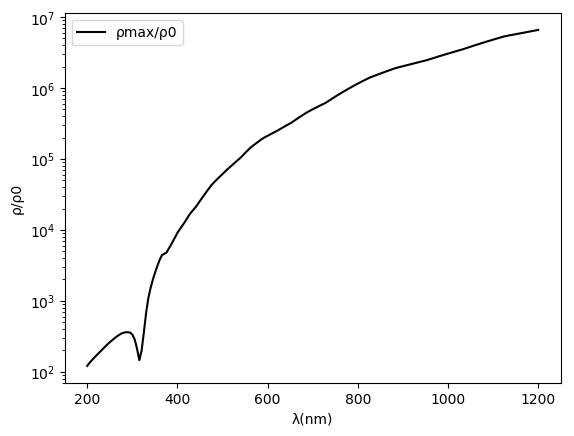

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10


PyObject <matplotlib.legend.Legend object at 0x13a325a90>

In [45]:
Nh = 100
Nd = 1
N = 200
lambda = range(200,stop=1200,length=N)/1e9
ρmax = zeros(N)
for i=1:N
    k = 2*π/lambda[i]
    d = 10e-9
    ω = k*3e8
    ϵ = itpr[ω]+itpi[ω]*1im
    χ = ϵ - 1
    ρmax[i] = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
end

figure(1)
semilogy(lambda*1e9,ρmax,"k-",label="ρmax/ρ0")
#ylim([2,10^3])
#xlim([200,600])
xlabel("λ(nm)")
ylabel("ρ/ρ0")
legend()

In [88]:
λtest = 600e-9
k = 2*π/λtest
d = 226e-9
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[88]:5
└ @ Core In[88]:5
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[88]:5
└ @ Core In[88]:5


120.98086901010002